# Royal Rumble Data Analysis

The WWE presents a product that is scripted entertainment in the veil of a legitimate sport. There are countless movies and tv shows that have depicted rare or impossible sporting events and outcomes, but professional wrestling as an art form relies on the suspension of the audience's disbelief- not merely for an hour or so, but in a sustained fashion over repeated viewings. Even though nearly every wrestling fan is aware of the fact that the product is scripted, they want it to be compelling theater. If a storyline is too predictable and/or doesn't align with what the audience desires as far as outcomes go, the outcry ranges from minor to near-revolt.

The Royal Rumble is an annual event that features a match by the same name, in which two wrestlers begin in the ring and another joins them every 1.5-2 minutes until 30 wrestlers have entered the ring. The only way to be eliminated from the match is by being thrown over the top rope and having both feet touch the ground (a quite literal rule that has been taken advantage of on many occasions), and the winner is the final wrestler left in the ring. It is one of the WWE's biggest attractions of the year, and the winner of the event is guaranteed to appear in the title match at WrestleMania (i.e., there are huge implications both in and out of the storyline itself).

Ultimately, the goal of this project is to answer a data science question, of course, but also an ontological question- namely, does the scripting of the WWE Royal Rumble occur in such a fashion that we can coherently predict the winners and/or generate a win-probability model *as though it were a real sporting event.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [2]:
## This csv file was generated using the scripts available in the repository

RUMBLE_DATA = pd.read_csv('Rumble_Data_Cleaned_Final.csv')

Using parametric estimation and other statistical and machine learning techniques to model deterministic phenomena is not unprecedented- in fact, it's quite the opposite. We constantly estimate fixed parameters because even though they're deterministic, the bread crumbs that lead to them are scattered randomly in varying quantities with varying precision. Additionally, deterministic choices by the scriptwriters of the WWE, when viewed through the guise of wrestling's veneer, can instead appear as performance metrics and indicators of success no different than those of a regular sporting event. We know ex ante that star wrestlers in the vein of Hulk Hogan and John Cena will be given ample time on-screen and eliminate several wrestlers- but statistical models have no way of parsing the difference between 'John Cena had 5 eliminations because it was scripted' and 'John Cena had 5 eliminations because he is a multiple-time world champion wrestler with exceptional skill in a fake domain.' The best motivating example of this is given in the plot below- for the 30 Royal Rumbles of uniform length (1988, 2011 and the 2018 'Greatest Royal Rumble' event are excluded), each point represents an individual wrestler in an individual year, with number of eliminations on the x-axis and time spent in the match on the y-axis.

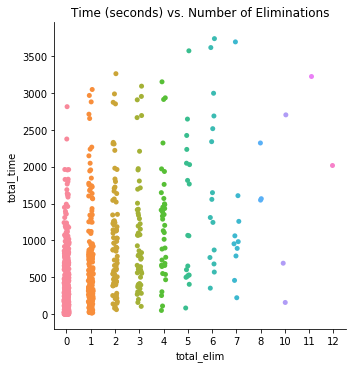

In [4]:
sns.catplot(x = 'total_elim', y = 'total_time', data = RUMBLE_DATA)

plt.title('Time (seconds) vs. Number of Eliminations')

plt.show()

The density of points in the range from 0-2 is extremely high, with less representation as total eliminations increases. But we observe *_almost no correlative relationship_* between number of eliminations and time spent in the ring. We can view this as good evidence that wrestling is scripted, as we would probably expect eliminations to increase the longer one spends in the match due to sheer opportunity alone. However, we can also interpret this as evidence that 'wrestling-as-real' shares common ground with the most popular sports in the world- it has both *offensive* and *defensive* components 

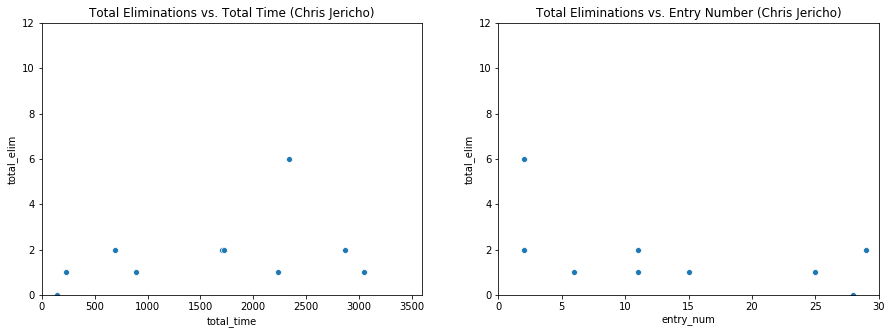

In [5]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'total_time', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Chris Jericho'])

plt.ylim(0,12)
plt.xlim(0,3600)
plt.title ('Total Eliminations vs. Total Time (Chris Jericho)')

plt.subplot(1,2,2)
sns.scatterplot(x = 'entry_num', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Chris Jericho'])

plt.ylim(0,12)
plt.xlim(0,30)
plt.title ('Total Eliminations vs. Entry Number (Chris Jericho)')

plt.show()

A common talking point on WWE television is how big of a disadvantage it is to enter into the match early. This is logical- it's much more difficult to outlast 29 people and battle for nearly an hour than it is to outlast a handful of people and only have to fight for 10 minutes. The plots above show that irrespective of what number he enters or how long he lasts in the match, Chris Jericho tends to have either 1 or 2 eliminations. We're confined to a small sample to analyze in general, but Chris Jericho has the ability to last a long time in the match- he is a lighter wrestler, a veteran of many years who honed his craft over the world. In the parlance we've developed, he is an excellent defensive wrestler, having lasted over 30 minutes on multiple occasions- observe the violin plot below.

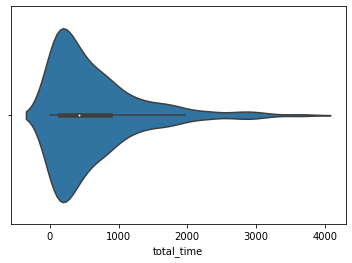

In [6]:
sns.violinplot(RUMBLE_DATA['total_time'])

If we examine the inner boxplot, all of the aforementioned performances are outliers in the total time distribution, and have very little probability mass according to the kernel density. On the other hand, there are also wrestlers who tend to produce many eliminations while not lasting very long in the match. Below are the same plots for the Big Show.

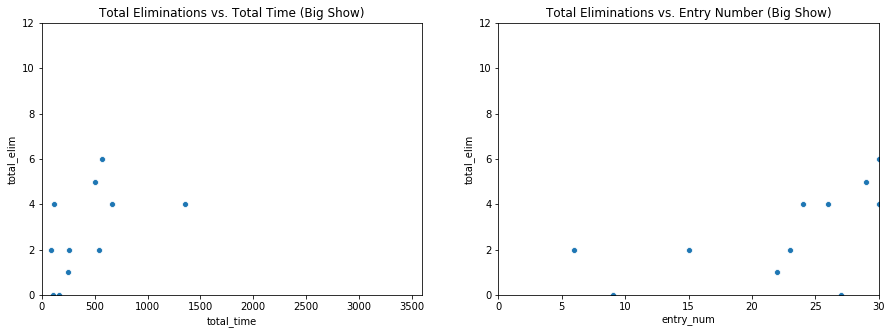

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = 'total_time', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Big Show'])

plt.ylim(0,12)
plt.xlim(0,3600)
plt.title ('Total Eliminations vs. Total Time (Big Show)')

plt.subplot(1,2,2)
sns.scatterplot(x = 'entry_num', y = 'total_elim',
                data = RUMBLE_DATA[RUMBLE_DATA['name'] == 'Big Show'])

plt.ylim(0,12)
plt.xlim(0,30)
plt.title ('Total Eliminations vs. Entry Number (Big Show)')

plt.show()

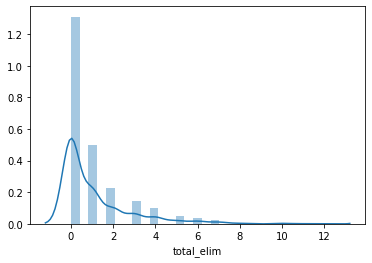

In [8]:
sns.distplot(RUMBLE_DATA['total_elim'])

Unlike the agile Chris Jericho, the Big Show is presented as a behemoth- a man who stands over 7 feet tall and weights 500 pounds. It does not require a great suspension of disbelief to reason that a smaller but skilled and agile wrestler with more stamina could outmaneuver many opponents to stay in the match for longer, while the enormously powerful contestant causes havoc before succumbing to cardiovascular limitations. Herein lies some of the divergence between reality and script. The Big Show's distribution over entry number is *clearly* not the discrete uniform distribution over the set {1,2,...,30} as the Royal Rumble purports it to be, because he serves an important role as a *plot device for a scripted television show.* He frequently enters the match late, and has been the runner up multiple times while a smaller wrestler "beats the odds" to eliminate him. A seasoned fan *knows* that the Big Show is not going to win the Royal Rumble, as the winner is catapulted into a focal point of Wrestlemania with a lengthy title match, which is not the manner in which Big Show is typically utilized. His entry and exits are listed below:

In [9]:
RUMBLE_DATA[['year', 'entry_num','exit_num']].loc[RUMBLE_DATA['name'] == 'Big Show']

,year,entry_num,exit_num
355,2000,26,29
382,2001,23,17
416,2002,27,23
473,2004,24,29
515,2006,6,7
629,2009,30,25
651,2010,22,22
689,2012,30,27
778,2015,29,28
794,2016,15,10


We do observe a downward trend in recent years (again, we are working in a (fictional) small sample space), but in general the Big Show is presented as a legitimate threat to win, with four finishes in the final four. Herein lies the fundamental schism underlying this analysis: a cogent win probability model should allocate some predictive capacity for him to win despite our ex ante knowledge that he won't.

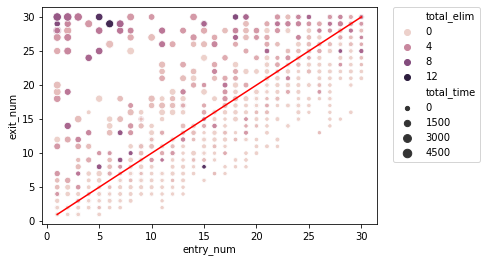

In [10]:
sns.scatterplot(x = 'entry_num', y = 'exit_num', size = 'total_time', hue = 'total_elim',  data = RUMBLE_DATA)

x_plot = np.linspace(1,30)
y_plot = x_plot
plt.plot(x_plot, y_plot, color = 'r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


Here we observe the general trend of the Royal Rumble. There is an extremely strong correlative relationship between the number in which you enter and the number at which you exit. The red line is simple y = x. Finishing below the line is not uncommon, but also indicates spending little time in the match and typically having fewer eliminations than those above the line. However, we also observe some mass in the upper left quadrant of this picture. Therein lie the truly elite competitors- a higher density of eliminations and lengthy stays in the match. This also shows that, at least across these dimensions, a simple linear model won't be sufficient as predicting which of the early entrants will have a stellar performance is critical to the success of the model. Additionally, we should seek to identify what features are driving not just high placement, but outright wins.

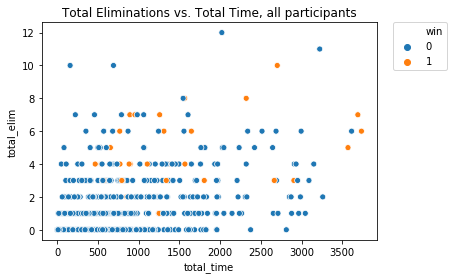

In [11]:
sns.scatterplot(x = 'total_time', y = 'total_elim', hue = 'win', data = RUMBLE_DATA)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Eliminations vs. Total Time, all participants')
plt.show()

Aside from Vince McMahon's victory in 1999 (he is a non-wrestling character who was inserted into the match and barely participated), we observe that winners typically have 3-7 eliminations, and while some spend nearly an hour in the match they generally spend 10-25 minutes competing.

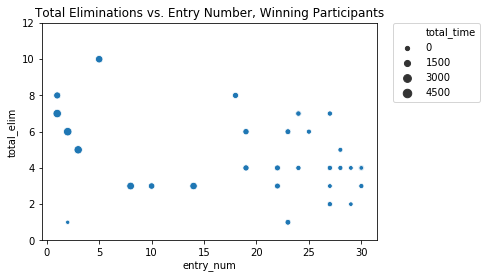

In [12]:
sns.scatterplot(x = 'entry_num', y = 'total_elim', size = 'total_time', data = RUMBLE_DATA.loc[RUMBLE_DATA['win'] ==1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Eliminations vs. Entry Number, Winning Participants')
plt.ylim(0,12)
plt.show()

Again, we observe an extremely weak correlative relationship between the number of eliminations and the temporal aspects of the match. Of the 30 years accounted for by this data, 9 of the victors entered at 15 or below, with the remaining 22 entering at 16 or higher. Entering later is clearly beneficial, but doesn't tell the whole story. We've also established, at least anecdotally, that there are both offensive and defensive aspects to the match. The images above are spread out a bit, so if we normalize the feature space we can get a picture using clusters.

In [12]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

km = KMeans(n_clusters = 4, init = 'random', n_init = 10, random_state = 0)

X = RUMBLE_DATA[['total_time','total_elim']]

min_max = preprocessing.MinMaxScaler()

x_scaled = min_max.fit_transform(X)

X = pd.DataFrame(x_scaled)

y_km = km.fit_predict(X)

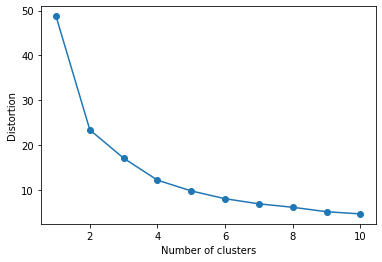

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The elbow plot tells us that four is the ideal number of clusters, which makes perfect sense- there are those who are skilled at staying in the match, there are those who are skilled at eliminating people, those who are neither, and those who are both.

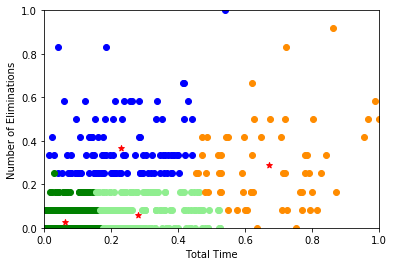

In [13]:
ax1 = plt.scatter(X[y_km == 0].iloc[:,0], X[y_km == 0].iloc[:,1] , c = 'blue')

ax2 = plt.scatter(X[y_km == 1].iloc[:,0], X[y_km == 1].iloc[:,1], c = 'green')

ax3 = plt.scatter(X[y_km == 2].iloc[:,0], X[y_km == 2].iloc[:,1], c = 'lightgreen')

ax4 = plt.scatter(X[y_km == 3].iloc[:,0], X[y_km == 3].iloc[:,1], c = 'darkorange')

ax5 = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red', marker = '*')

plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('Total Time')
plt.ylabel('Number of Eliminations')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

The strong mass in green relative to blue indicates that medium stays in the match are easier to come by than multiple eliminations. This is also sensible given the discreteness of eliminations, as there are only 29 to divvy up among the 30 entrants, and the possible number of eliminations for any entrant is capped by how many have occurred prior to their entry. Indeed, when looking for winners, we expect some from the blue group- those who enter late and clean house, and some from the orange group- those who can fend for themselves while also eliminating enough wrestlers to end up on top. As we set out to model the match results, especially using historical data, it is important to have representation across the entire sample space. The density of repeat entrants soars through the upper two thirds of the data set, so the train-test split needs to ensure enough representation across the sample space to make good predictions throughout.

In [5]:
import random

random.seed(0)

cluster_1 = [1989,1990,1991,1992,1993]
cluster_2 = [1994,1995,1996,1997,1998]
cluster_3 = [1999,2000,2001,2002,2003]
cluster_4 = [2004,2005,2006,2007,2008]
cluster_5 = [2009,2010,2012,2013,2014]
cluster_6 = [2015,2016,2017,2018,2019]

test_years = []

test_years.append(random.sample(cluster_1, 1))
test_years.append(random.sample(cluster_2, 1))
test_years.append(random.sample(cluster_3, 1))
test_years.append(random.sample(cluster_4, 1))
test_years.append(random.sample(cluster_5, 1))
test_years.append(random.sample(cluster_6, 1))

print(test_years)

[[1992], [1997], [1999], [2006], [2014], [2018]]


In [6]:
cluster_1_mask = ((RUMBLE_DATA['year'] == 1989) |
                  (RUMBLE_DATA['year'] == 1990) |
                  (RUMBLE_DATA['year'] == 1991) |
                  (RUMBLE_DATA['year'] == 1993))

cluster_2_mask = ((RUMBLE_DATA['year'] == 1994) |
                  (RUMBLE_DATA['year'] == 1995) |
                  (RUMBLE_DATA['year'] == 1996) |
                  (RUMBLE_DATA['year'] == 1998))

cluster_3_mask = ((RUMBLE_DATA['year'] == 2000) |
                  (RUMBLE_DATA['year'] == 2001) |
                  (RUMBLE_DATA['year'] == 2002) |
                  (RUMBLE_DATA['year'] == 2003))

cluster_4_mask = ((RUMBLE_DATA['year'] == 2004) |
                  (RUMBLE_DATA['year'] == 2005) |
                  (RUMBLE_DATA['year'] == 2007) |
                  (RUMBLE_DATA['year'] == 2008))

cluster_5_mask = ((RUMBLE_DATA['year'] == 2009) |
                  (RUMBLE_DATA['year'] == 2011) |
                  (RUMBLE_DATA['year'] == 2012) |
                  (RUMBLE_DATA['year'] == 2013))

cluster_6_mask = ((RUMBLE_DATA['year'] == 2015) |
                  (RUMBLE_DATA['year'] == 2016) |
                  (RUMBLE_DATA['year'] == 2017) |
                  (RUMBLE_DATA['year'] == 2019))

rumble_train = RUMBLE_DATA.loc[cluster_1_mask | cluster_2_mask | cluster_3_mask |
                                    cluster_4_mask | cluster_5_mask | cluster_6_mask]

In [7]:
test_mask = ((RUMBLE_DATA['year'] == 1992) |
                  (RUMBLE_DATA['year'] == 1997) |
                  (RUMBLE_DATA['year'] == 1999) |
                  (RUMBLE_DATA['year'] == 2006) |
                  (RUMBLE_DATA['year'] == 2014) |
                  (RUMBLE_DATA['year'] == 2018)
                )

rumble_test = RUMBLE_DATA.loc[test_mask]

We don't have the luxury of a large data set- with only 30 matches and without uniform participation across all years, we have a dearth of results relative to even one NBA or MLB season. The typical baseline win model of logistic regression is an extremely poor fit for this model. In any given year there is precisely one winner (except for the simultaneous elimination in 1993- the corner case rate is truly amazing). A ratio of 29 zeroes to only one 1 will produce excellent specificity but horrific sensitivity, and predicting the one winner in any year will be almost impossible. An ordinal logistic regression model with 30 outcomes has far too little data to train on, and is asking far too much in general of the data. We can at least start by exploring the most basic implementation of a regression model, with the exit number as the dependent variable. This is a good working proxy- the most likely winner according to the model would be the one with the highest predicted exit number. The chosen variables came from many iterations of looking at the R^2 on the test data, as well as the plots and predictions. They are:

- Previous Royal Rumble wins
- Entry Number in the Royal Rumble match
- Average cumulative time over all previous participation(s) in the Royal Rumble match
- Average cumulative eliminations over all previous participation(s) in the Royal Rumble match
- Number of reigns as world champion
- Number of reigns as Intercontinental champion
- Total break taken during the match (time spent out of the ring illegally and/or due to injury)
- The amount of time spent in the ring with a tag team partner or a member of the same faction, if any

In [14]:
features = ['prev_win','entry_num','avg_cum_time', 'prev_app',
                     'avg_cum_elim', 'world_reigns', 'ic_reigns',
                       'total_break', 'tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]

y_test = rumble_test['exit_num']

In [15]:
from sklearn.linear_model import LinearRegression

lnrmdl = LinearRegression()

lnrmdl.fit(X_train,y_train)

linreg_pred = lnrmdl.predict(X_test)

print(lnrmdl.score(X_test,y_test))
print(list(zip(lnrmdl.coef_, features)))

0.5448574154673131
[(1.346706030764479, 'prev_win'), (0.7142607408193866, 'entry_num'), (0.001047792810909165, 'avg_cum_time'), (-0.34867485078037724, 'prev_app'), (0.6244085762541337, 'avg_cum_elim'), (0.1823650596215247, 'world_reigns'), (1.0260130255208824, 'ic_reigns'), (0.008169720298681842, 'total_break'), (0.0059202425833589385, 'tag_overlap')]


As always, the beauty of the linear regression model is that we have clean interpretations of all the coefficients- , an additional bump of 1 in expected exit number for every reign as Intercontinental champion, an additional increase of .7 in exit number for every unit increase in entry number, and so on. The traditional OLS model compared favorably to LASSO, ridge, and elastic net models- none of which could solve a fundamental problem with the OLS estimates: the linear model is ill-posed for some of the most important observations. In 1992, Ric Flair had no previous Royal Rumble experience, but was a decades-long veteran of professional wrestling with multiple title reigns. Similarly, in 2018, the #2 entrant was a world champion who entered his first Royal Rumble and he lasted until the final four, while the eventual winner was the #14 entrant, yet another wrestler in this vein who was making his Royal Rumble debut. 

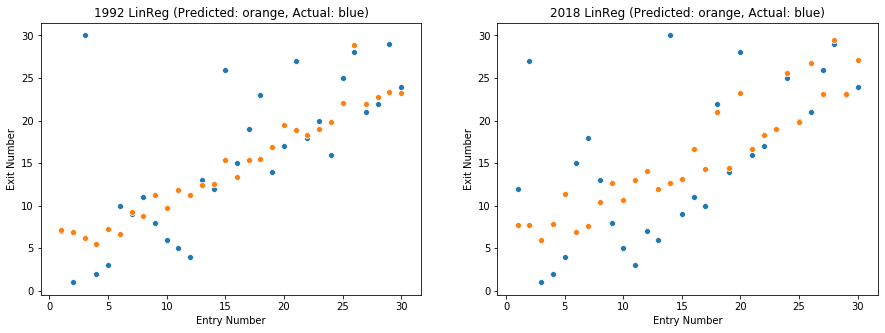

In [189]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

sns.scatterplot(x = range(1,31), y = y_test[0:30])

sns.scatterplot(x = range(1,31), y = linreg_pred[0:30])

plt.title('1992 LinReg (Predicted: orange, Actual: blue)')

plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(1,2,2)

sns.scatterplot(x = range(1,31), y = y_test[150:180])

sns.scatterplot(x = range(1,31), y = linreg_pred[150:180])

plt.title('2018 LinReg (Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.show()

Our ideal model would be able to fit the local pockets of extremely linear data, while also being 'smart' enough to detect anomalies. Gradient boosting is a potential fit for this situation. With hyperparameter optimization and/or cross-validation, we can train the weak learners to detect the nonlinear trends that are vital to predicting how the match will unfold. By starting with some very minor tuning of the hyperparameters, we can compare the results to the linear model.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, learning_rate =.1)

gbreg.fit(X_train,y_train)

print(gbreg.score(X_test,y_test))
print(list(zip(gbreg.feature_importances_, features)))

0.554858740127669
[(0.0034926166361481043, 'prev_win'), (0.6904979413168656, 'entry_num'), (0.07081068002627751, 'avg_cum_time'), (0.019367963109514885, 'prev_app'), (0.0335033885696147, 'avg_cum_elim'), (0.02276352836488422, 'world_reigns'), (0.04476920476699954, 'ic_reigns'), (0.05420853120107396, 'total_break'), (0.060586146008621444, 'tag_overlap')]


In [21]:
gb_pred = gbreg.predict(X_train)

We obtain a similar coefficient of determination, while also observing how tremendous an impact that entry number has on predicting exit number. The gradient boost regressor without much hyperparameter tuning sacrifices some accuracy in the highly linear regions, but can account for some non-linearities in the dataset that the linear regression model may not be able to track. However, we observe that the linear model is *excellent* at predicting the non-linearities in some hyper-specific instances. For example, through pure randomness, the test set included the 1999 Royal Rumble, in which Vince McMahon spent nearly the entire match (almost an hour) outside of the ring and not participating, only entering at the end to win. 

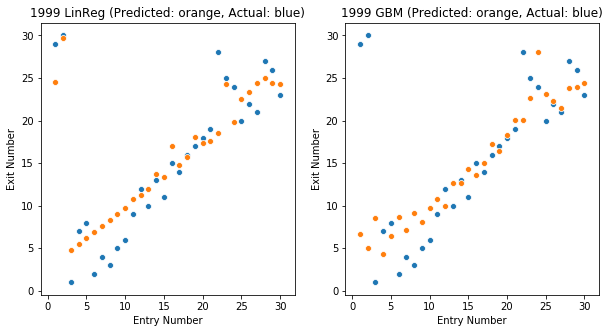

In [174]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.scatterplot(x = range(1,31), y = y_test[60:90])
sns.scatterplot(x = range(1,31), y = linreg_pred[60:90])
plt.title('1999 LinReg (Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(1,2,2)
sns.scatterplot(x = range(1,31), y = y_test[60:90])
sns.scatterplot(x = range(1,31), y = gb_pred[60:90])
plt.title('1999 GBM (Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.show()

In [177]:
#Vince McMahon's feature vector in the 1999 Royal Rumble
VINCE = RUMBLE_DATA.iloc[301,:]
VINCE[features]

prev_win           0
entry_num          2
avg_cum_time       0
prev_app           0
avg_cum_elim       0
world_reigns       0
ic_reigns          0
total_break     3132
tag_overlap        0
Name: 301, dtype: object

With 0 for every feature besides his entry number, excluding the break time, his predicted exit number would be less than 1. He was in the ring for less than 4 minutes, but with the linear multiplier of ~.054 for total break, the 3132 seconds turned into an additional 29 units of predicted exit number- and he was correctly "identified" as the winner. Similarly, we can look at 2014. Seth Rollins entered at #2 with no previous Royal Rumble experience either, and the linear regression provided a much higher (and more accurate) prediction.

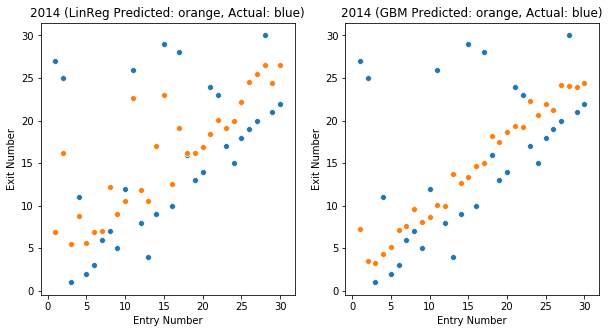

In [176]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.scatterplot(x = range(1,31), y = y_test[120:150])
sns.scatterplot(x = range(1,31), y = linreg_pred[120:150])
plt.title('2014 (LinReg Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.subplot(1,2,2)
sns.scatterplot(x = range(1,31), y = y_test[120:150])
sns.scatterplot(x = range(1,31), y = gb_pred[120:150])
plt.title('2014 (GBM Predicted: orange, Actual: blue)')
plt.xlabel('Entry Number')
plt.ylabel('Exit Number')

plt.show()

In [179]:
#Seth Rollins' feature vector in the 2014 Royal Rumble
SR14 = RUMBLE_DATA.iloc[721,:]
SR14[features]

prev_win           0
entry_num          2
avg_cum_time       0
prev_app           0
avg_cum_elim       0
world_reigns       0
ic_reigns          0
total_break        0
tag_overlap     2047
Name: 721, dtype: object

Seth Rollins spent over a half hour in the ring with his teammates in the Shield. They had debuted a little over a year prior, and were highly touted prospects who were booked to look extremely strong over the course of the year. A group of powerful wrestlers collaborating and wreaking havoc is a classic Royal Rumble trope, albeit one that only happens periodically- and the linear regression coefficient of ~.006 adds roughly 12 estimated places to his exit number. Note that the linear regression doesn't do a *good* job of this prediction, as the residual is still quite large for the estimate, which we identify as the extratextual qualities of 'meant to look strong' and 'emerging main event superstar' which we can parse but the model can't.

There are side-by-side comparisons for each of the test years below. In some cases, the linear model does an excellent job of fitting to the non-linearities (in the most important feature dimension), while the gradient boost is better in others. The linear regression model as a hatchet works extremely well for very specific feature dimensions, and we happened to stumble on extreme instances of them in the test set. Meanwhile, the gradient boost is much better at predicting based on wrestler-specific, highly dense variables like championship reigns. The gradient boost picks out anomalies in 2006 and 2018 that the linear regression simply can't account for as they can be thought of as excellent performances by wrestlers with good Royal Rumble skills, and not anomalous events or extreme values of an underrepresented feature. 

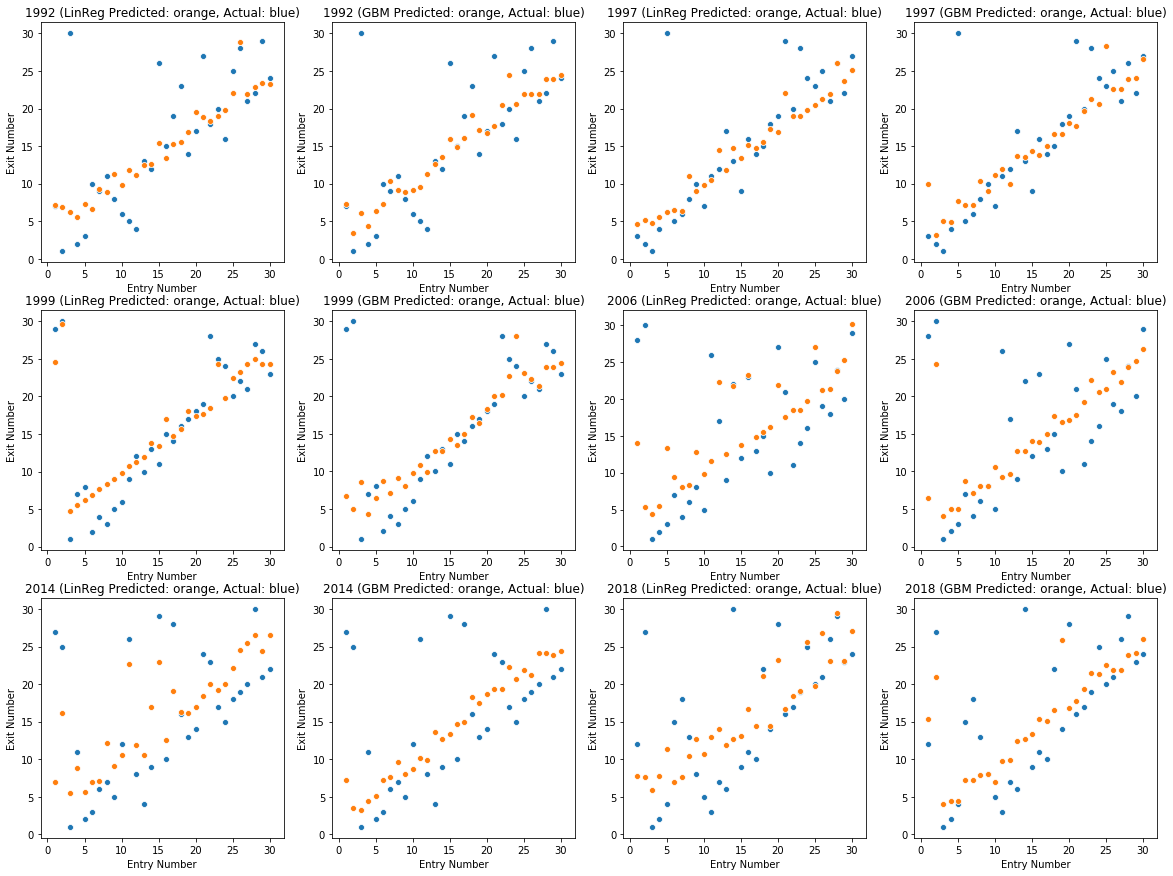

In [153]:
plt.figure(figsize = (20,15))
columns = 4
rows = 3
odd_counter = 1
even_counter = 2
test_years = [1992, 1997, 1999, 2006, 2014, 2018]
i = 0

for year in test_years:
    plt.subplot(rows,columns,odd_counter)
    sns.scatterplot(x = range(1,31), y = y_test[30*i:30*(i + 1)])
    sns.scatterplot(x = range(1,31), y = linreg_pred[30*i:30*(i+1)])
    plt.title(str(year) + ' (LinReg Predicted: orange, Actual: blue)')
    plt.xlabel('Entry Number')
    plt.ylabel('Exit Number')
    
    plt.subplot(rows,columns,even_counter)
    sns.scatterplot(x = range(1,31), y = y_test[30*i:30*(i+1)])
    sns.scatterplot(x = range(1,31), y = gb_pred[30*i:30*(i+1)])
    plt.title(str(year) + ' (GBM Predicted: orange, Actual: blue)')
    plt.xlabel('Entry Number')
    plt.ylabel('Exit Number')
    
    odd_counter += 2
    even_counter += 2
    i += 1
    
plt.show()

Because of the imbalances across different years, it makes sense to cross-validate both models. I am opting for 10-fold cross-validation stratified by year so that the model ingests whole matches to make predictions.

In [186]:
np.random.seed(0)

years = pd.Series(RUMBLE_DATA['year'].unique())
years = years.sample(frac=1).reset_index(drop = True)

cv_clusters = []
gb_cv_scores = np.zeros(10)
linreg_cv_scores = np.zeros(10)

for i in range(10):
    cv_clusters.append([years[3*i],years[3*i + 1],years[3*i + 2]])
    
for i in range(10):
    gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, 
                                      learning_rate =.1)
    linreg = LinearRegression()
    year_0 = cv_clusters[i][0]
    year_1 = cv_clusters[i][1]
    year_2 = cv_clusters[i][2]
    cv_mask = ((RUMBLE_DATA['year'] != year_0) &
                (RUMBLE_DATA['year'] != year_1) &
                (RUMBLE_DATA['year'] != year_2))
    X_train = RUMBLE_DATA[features].loc[cv_mask]
    y_train = RUMBLE_DATA['exit_num'].loc[cv_mask]
    X_test = RUMBLE_DATA[features].loc[~cv_mask]
    y_test = RUMBLE_DATA['exit_num'].loc[~cv_mask]
    
    gbreg.fit(X_train,y_train)
    gb_cv_scores[i] = gbreg.score(X_test,y_test)
    linreg.fit(X_train,y_train)
    linreg_cv_scores[i] = linreg.score(X_test,y_test)
   
print('Gradient Boost Cross-Validation Scores')    
print([i for i in zip(cv_clusters,gb_cv_scores)])
print(gb_cv_scores.mean())
print(gb_cv_scores.var())
print('Linear Regression Cross-Validation Scores')    
print([i for i in zip(cv_clusters,linreg_cv_scores)])
print(linreg_cv_scores.mean())
print(linreg_cv_scores.var())
    

Gradient Boost Cross-Validation Scores
[([1991, 2018, 2002], 0.5396494379734036), ([1999, 2016, 2014], 0.6959049403061313), ([2017, 2000, 2006], 0.5767126510429252), ([2012, 1994, 2005], 0.655055639285901), ([1997, 2003, 2013], 0.5219498321974099), ([2009, 1990, 2019], 0.6025124492656952), ([1995, 1993, 2007], 0.5980035351076509), ([2008, 1998, 1996], 0.5996250473153031), ([2015, 1992, 1989], 0.574477902992231), ([2010, 2004, 2001], 0.713381110181921)]
0.6077272545668573
0.0035425188457932507
Linear Regression Cross-Validation Scores
[([1991, 2018, 2002], 0.5801027924092266), ([1999, 2016, 2014], 0.7216378911216648), ([2017, 2000, 2006], 0.5766526802856707), ([2012, 1994, 2005], 0.5677080328718822), ([1997, 2003, 2013], 0.5700499745239849), ([2009, 1990, 2019], 0.6429152994461023), ([1995, 1993, 2007], 0.5398847580024522), ([2008, 1998, 1996], 0.5693724226137271), ([2015, 1992, 1989], 0.670376212850821), ([2010, 2004, 2001], 0.6751955461492793)]
0.6113895610274811
0.003338012216674661


This is promising! The cross-validation scores average out to be better than the train/test split scores, and the variance is quite low for both estimators. This indicates that we have two cogent models, and that we can feel comfortable using these models to predict outcomes for this coming year's Royal Rumble without having overfit too specifically to our data. There are two important points to make before we proceed. The first is that, except for the 'total break' and 'tag overlap' features, we only used the entry number and historical results and other correlates with imagined wrestler skill or toughness like title reigns. The 'total break' feature is only non-zero for ~3-4 percent of the dataset, and less than 1 percent of the data showed breaks of 20 minutes or more. We do, however, observe that breaks seem to occur alongside other breaks, and that they've become more frequent. An advanced version of the model may be able to incorporate estimates for the probability that one or more breaks occur, but it seems too idiosyncratic to storylines. For a version of the model that could update live as entrants enter and exit the match, the probability of one or more breaks may coalesce in a more meaningful way as direct observations instead of ex ante predictions.

In [190]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['total_break'] > 0])

32

In [192]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['total_break'] > 1200])

6

In [193]:
RUMBLE_DATA.loc[RUMBLE_DATA['total_break'] > 0, 'year'].value_counts()

2016    4
1993    3
2018    3
2019    3
2015    3
1999    2
2008    2
2017    2
2001    2
2004    1
2003    1
2002    1
2012    1
1998    1
1996    1
2005    1
2010    1
Name: year, dtype: int64

The 'tag overlap' feature is similar. Almost exactly half of the wrestlers who have a teammate who is also in the match never overlap with their partner(s), and long periods of overlap are rare. Additionally, the incidence for individuals is inflated relative to the rate of occurrence, as every single instance of a cooperative effort gets counted at least doubly.

In [194]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['tag_overlap'] > 0])

120

In [195]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['tag_team'] > 0])

236

In [197]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['tag_overlap'] > 300])

59

In [198]:
len(RUMBLE_DATA.loc[RUMBLE_DATA['tag_overlap'] > 1200])

14

The most tantalizing feature to include is the number of eliminations a wrestler has. While it isn't true for every single winner, a common trend is winners over-performing relative to their historical metrics as well as the horizontal ones within the match that they win. This aligns perfectly with the idea of one or more players performing above expectations during a critical period in the playoffs and carrying their team to victory. The plots below help paint the picture: 

Text(0.5, 1.0, 'John Cena Eliminations by Year')

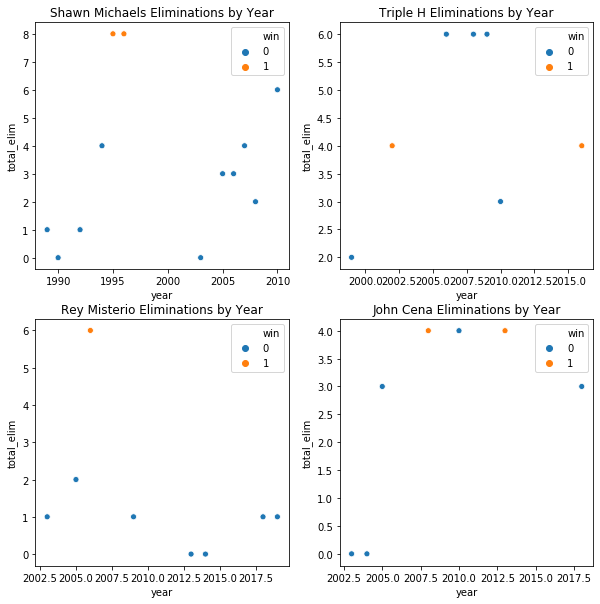

In [204]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.scatterplot(x = 'year', y = 'total_elim', hue = 'win', 
            data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels'])
plt.title('Shawn Michaels Eliminations by Year')

plt.subplot(2,2,2)
sns.scatterplot(x = 'year', y = 'total_elim', hue = 'win', 
            data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Triple H'])
plt.title('Triple H Eliminations by Year')

plt.subplot(2,2,3)
sns.scatterplot(x = 'year', y = 'total_elim', hue = 'win', 
            data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Rey Mysterio'])
plt.title('Rey Misterio Eliminations by Year')

plt.subplot(2,2,4)
sns.scatterplot(x = 'year', y = 'total_elim', hue = 'win', 
            data = RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'John Cena'])
plt.title('John Cena Eliminations by Year')

plt.show()

In [50]:
features = ['prev_win','entry_num','avg_cum_time', 'prev_app', 
             'total_elim','avg_cum_elim','world_reigns','ic_reigns',
                       'total_break','tag_overlap']

y_train = rumble_train['exit_num']

X_train = rumble_train[features]

X_test = rumble_test[features]

y_test = rumble_test['exit_num']

X = RUMBLE_DATA[features]
y = RUMBLE_DATA['exit_num']

In [76]:
np.random.seed(0)

years = pd.Series(RUMBLE_DATA['year'].unique())
years = years.sample(frac=1).reset_index(drop = True)

cv_clusters = []
gb_cv_scores = np.zeros(10)
linreg_cv_scores = np.zeros(10)

for i in range(10):
    cv_clusters.append([years[3*i],years[3*i + 1],years[3*i + 2]])
    
for i in range(10):
    gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 92, 
                                      learning_rate =.1)
    linreg = LinearRegression()
    vote_reg = VotingRegressor([('LR',linreg),('GB',gbreg)], weights = np.array([.5,.5]))
    year_0 = cv_clusters[i][0]
    year_1 = cv_clusters[i][1]
    year_2 = cv_clusters[i][2]
    cv_mask = ((RUMBLE_DATA['year'] != year_0) &
                (RUMBLE_DATA['year'] != year_1) &
                (RUMBLE_DATA['year'] != year_2))
    X_train = RUMBLE_DATA[features].loc[cv_mask]
    y_train = RUMBLE_DATA['exit_num'].loc[cv_mask]
    X_test = RUMBLE_DATA[features].loc[~cv_mask]
    y_test = RUMBLE_DATA['exit_num'].loc[~cv_mask]
    
    gbreg.fit(X_train,y_train)
    gb_cv_scores[i] = gbreg.score(X_test,y_test)
    linreg.fit(X_train,y_train)
    linreg_cv_scores[i] = linreg.score(X_test,y_test)
   
print('Gradient Boost Cross-Validation Scores')    
print([i for i in zip(cv_clusters,gb_cv_scores)])
print(gb_cv_scores.mean())
print(gb_cv_scores.var())
print('Linear Regression Cross-Validation Scores')    
print([i for i in zip(cv_clusters,linreg_cv_scores)])
print(linreg_cv_scores.mean())
print(linreg_cv_scores.var())

Gradient Boost Cross-Validation Scores
[([1991, 2018, 2002], 0.7043681945251297), ([1999, 2016, 2014], 0.704123427300424), ([2017, 2000, 2006], 0.6629662293910414), ([2012, 1994, 2005], 0.7780622327631779), ([1997, 2003, 2013], 0.697348042570554), ([2009, 1990, 2019], 0.7122327029506573), ([1995, 1993, 2007], 0.7739533183406974), ([2008, 1998, 1996], 0.6541728171022752), ([2015, 1992, 1989], 0.7638782676009055), ([2010, 2004, 2001], 0.7879766469413906)]
0.7239081879486252
0.0021331500980104503
Linear Regression Cross-Validation Scores
[([1991, 2018, 2002], 0.691268298995839), ([1999, 2016, 2014], 0.7261902519212347), ([2017, 2000, 2006], 0.677292768954065), ([2012, 1994, 2005], 0.7381875297099403), ([1997, 2003, 2013], 0.6436179070287888), ([2009, 1990, 2019], 0.7223786165217878), ([1995, 1993, 2007], 0.6883187028857538), ([2008, 1998, 1996], 0.6350638352421383), ([2015, 1992, 1989], 0.7721647680996021), ([2010, 2004, 2001], 0.8283998990129752)]
0.7122882578372124
0.003095325376089327


We observed that the linear regression model worked very well in identifying anomalies of a very specific kind, while the gradient boost regressor is better at detecting the "average case" anomalies that we anticipate in almost every Royal Rumble match. The cross-validation mean and variance support the idea that the gradient boost works best as a smoothed out model, but the linear regression will fit certain pockets well because the additional impact of certain rare linear predictors will trump the decision-tree splits on feature importance. The R^2 scores below are for the linear regression and gradient boost models trained on the entire data set, as well as a naive voting regression that combines the two scores.

In [79]:
from sklearn.ensemble import VotingRegressor

linreg = LinearRegression()
gbreg = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 2, n_estimators = 60,
                                  learning_rate =.1)

er = VotingRegressor([('LR',lnrmdl),('GB',gbreg)])
X = RUMBLE_DATA[features]
y = RUMBLE_DATA['exit_num']
er.fit(X,y)
vote_pred = er.predict(X)
print('Voting Score: ' + str(er.score(X,y)))

linreg.fit(X,y)
linreg_pred = linreg.predict(X)
print('Linear Regression Score: ' + str(linreg.score(X,y)))

gbreg.fit(X,y)
gb_pred = gbreg.predict(X)
print('Gradient Boost Score: ' + str(gbreg.score(X,y)))

Voting Score: 0.7823047180033655
Linear Regression Score: 0.7203216263439519
Gradient Boost Score: 0.8117827900429091


Because of its predictive efficacy on the average case instances of the Royal Rumble, I will proceed in making future predictions based on the gradient boost model. There are comparison plots for 5 selected years below, each of which provides good empirical support for this choice.

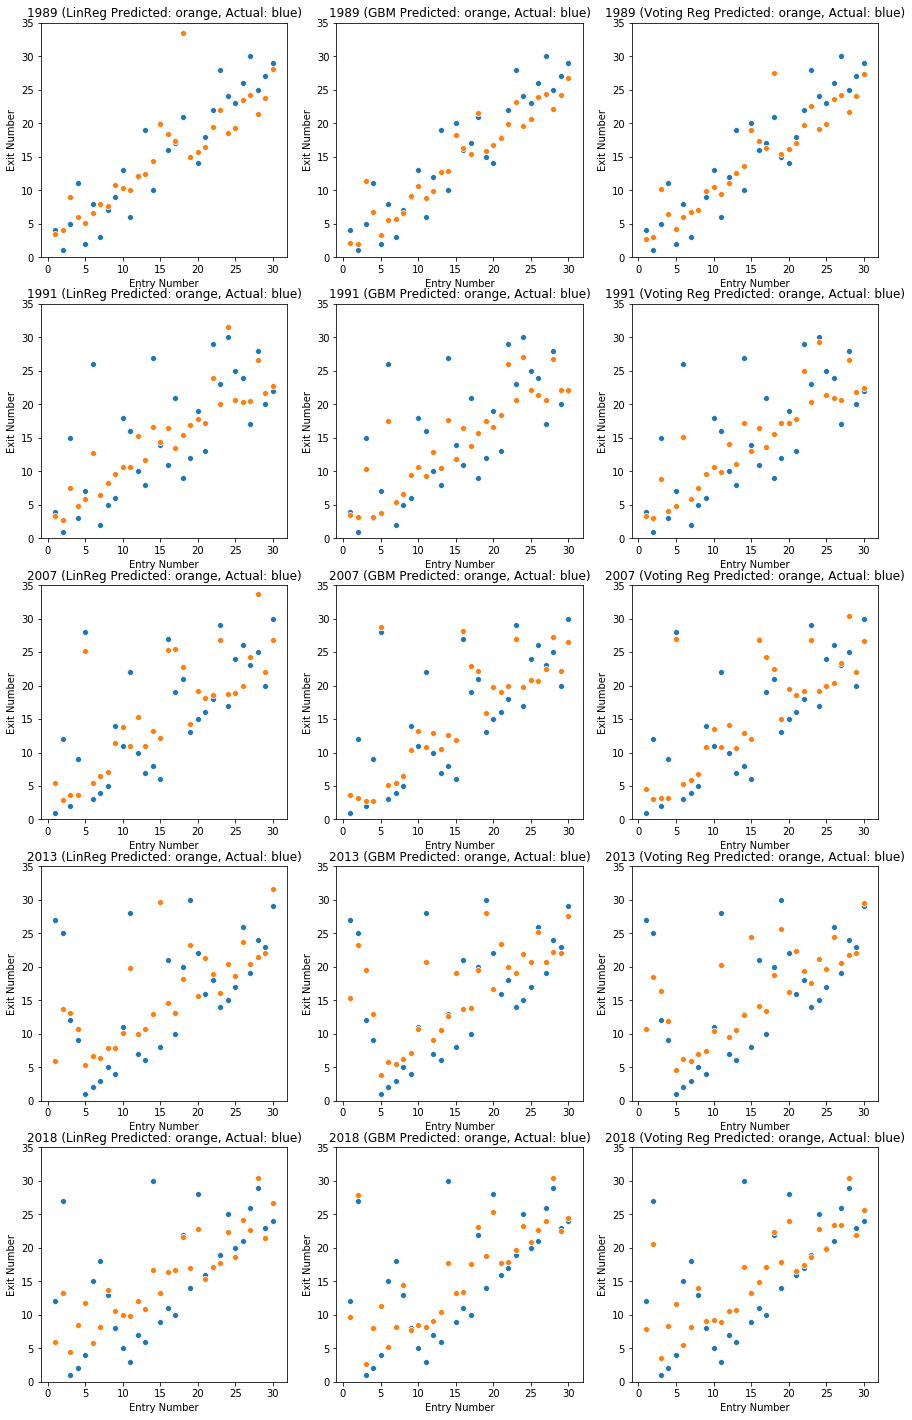

In [83]:
year_list = [0,2,18,23,28]
    
plt.figure(figsize = (15,25))
counter = 0
for i in year_list:
    year = RUMBLE_DATA['year'].unique()[i]
    plt.subplot(5,3,1 + counter)
    sns.scatterplot(x = range(1,31), y = y[30*i:30*(i+1)])
    sns.scatterplot(x = range(1,31), y = linreg_pred[30*i:30*(i+1)])
    plt.title(str(year) + ' (LinReg Predicted: orange, Actual: blue)')
    plt.xlabel('Entry Number')
    plt.ylabel('Exit Number')
    plt.ylim(0,35)
    plt.subplot(5,3,2 + counter)
    sns.scatterplot(x = range(1,31), y = y[30*i:30*(i+1)])
    sns.scatterplot(x = range(1,31), y = gb_pred[30*i:30*(i+1)])
    plt.title(str(year) + ' (GBM Predicted: orange, Actual: blue)')
    plt.xlabel('Entry Number')
    plt.ylabel('Exit Number')
    plt.ylim(0,35)
    plt.subplot(5,3,3 + counter)
    sns.scatterplot(x = range(1,31), y = y[30*i:30*(i+1)])
    sns.scatterplot(x = range(1,31), y = vote_pred[30*i:30*(i+1)])
    plt.title(str(year) + ' (Voting Reg Predicted: orange, Actual: blue)')
    plt.xlabel('Entry Number')
    plt.ylabel('Exit Number')
    plt.ylim(0,35)
    
    counter += 3
plt.show()

In both 1989 and 1991, the simple linear model makes off the chart predictions that Hulk Hogan will win. 1989 was Hulk Hogan's first foray (only the second Royal Rumble ever, and the first to have 30 entrants), so although there wasn't in-match historical data to use, the gradient boost still made an accurate prediction based only on title history and in-match eliminations. The gradient boost model picks him to win in 1991 while still making a reasonable estimate that doesn't exceed 30. None of the models were able to correctly identify the winner in 2007, but the gradient boost gets extremely close estimates for the last 5 competitors in the match. 2013 shows again how an extreme result of one instance of a variable (in this case, the #30 entrant Ryback's 5 eliminations) can cause the linear model to overestimate, while the gradient boost model can make a much more nuanced prediction, and correctly identifies the final two entrants with the linear regression model being way off. Finally, 2018 was extremely difficult for each model in terms of predicting the winner- an experienced wrestler from Japan who was new to WWE. However, the gradient boost model almost perfectly estimates the #2 entrant Finn Balor's long-lasting performance, which the linear and voting models categorically underestimate despite his four eliminations.

In looking towards creating a simulator for the upcoming 2020 Royal Rumble, we have all the necessary historical data that we need to make estimates using the gradient boost regression. However, we need a coherent model that can estimate *future* elimination estimates ex ante. There is far too little data specific to each wrestler for autoregression or other time series models to make strong predictions. Instead, we can lean on two key ideas. One is that we do observe a great deal of empirical regularity in year-to-year eliminations by each wrestler, so we expect the variance to come from both factors that we know to exist outside of the model (different wrestlers are chosen to look strong or weak based on the storyline) and in-match variance (you can't eliminate 10 wrestlers if only 7 are left in the match when you come in) that will already be accounted for. Although we don't have deep historical data for each individual, the K-means analysis from earlier showed that there is similarity across specific "kinds" of wrestlers based on their ability to eliminate people and/or remain in the match for long periods of time. A reminder:

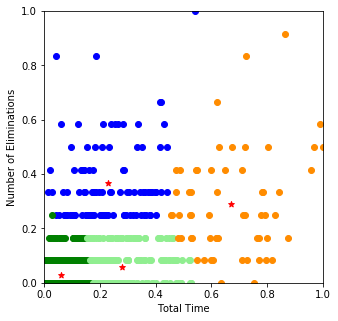

In [84]:
km = KMeans(n_clusters = 4, init = 'random', n_init = 10, random_state = 0)

X = RUMBLE_DATA[['total_time','total_elim']]

min_max = preprocessing.MinMaxScaler()

x_scaled = min_max.fit_transform(X)

X = pd.DataFrame(x_scaled)

y_km = km.fit_predict(X)

ax1 = plt.scatter(X[y_km == 0].iloc[:,0], X[y_km == 0].iloc[:,1] , c = 'blue')

ax2 = plt.scatter(X[y_km == 1].iloc[:,0], X[y_km == 1].iloc[:,1], c = 'green')

ax3 = plt.scatter(X[y_km == 2].iloc[:,0], X[y_km == 2].iloc[:,1], c = 'lightgreen')

ax4 = plt.scatter(X[y_km == 3].iloc[:,0], X[y_km == 3].iloc[:,1], c = 'darkorange')

ax5 = plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'red', marker = '*')

plt.rcParams['figure.figsize'] = [5, 5]
plt.xlabel('Total Time')
plt.ylabel('Number of Eliminations')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Without good time series estimates, our best bet is to try and parse what features increase the elimination rate on fixed time intervals- i.e. Poisson regression. If we try to do this across the entire data set, we run into a problem that stops that parameterization in its tracks: 

In [159]:
print('Mean eliminations: ' + str(RUMBLE_DATA['total_elim'].mean()))
print('Variance in eliminations: ' + str(RUMBLE_DATA['total_elim'].var()))

Mean eliminations: 1.1011111111111112
Variance in eliminations: 3.0542813002101106


The data is overdispersed, so the negative binomial model is a better fit. In general, we can't just try to fit one regression for everyone. Instead, it makes sense to re-scale the total time relative to the length of the match in each year, and then classify each wrestler based on the length of their stay relative to the length of the match accordingly. Twentieth percentiles are the best fit to ensure we have enough data and to minimize in-class variation as much as possible.

In [152]:
for year in RUMBLE_DATA['year'].unique():
    year_bool = (RUMBLE_DATA['year'] == year)
    year_max = RUMBLE_DATA.loc[year_bool,'total_time'].max()
    RUMBLE_DATA.loc[year_bool, 'time_scaled'] = RUMBLE_DATA.loc[year_bool,'total_time']/year_max
RUMBLE_DATA['time_class'] = 0

for i in range(5):
    RUMBLE_DATA.loc[(RUMBLE_DATA['time_scaled'] > .2*i) &
                   (RUMBLE_DATA['time_scaled'] < .2*(i+1)), 'time_class'] = i

RUMBLE_DATA['time_class'].value_counts() 

0    536
1    188
2    108
3     43
4     25
Name: time_class, dtype: int64

Mean: 0.7686567164179104
Var: 2.406193332403404


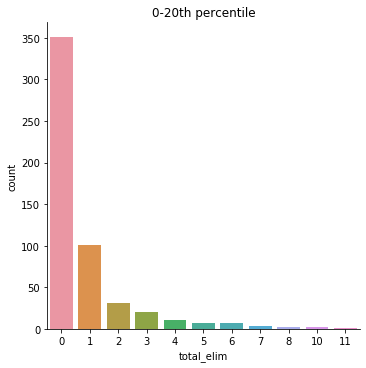

In [177]:
plot_data = RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 0]
sns.catplot(x ='total_elim',data= plot_data,kind = 'count')
plt.title('0-20th percentile')
print('Mean: ' + str(plot_data['total_elim'].mean()))
print('Var: ' + str(plot_data['total_elim'].var()))

Mean: 1.2393617021276595
Var: 2.9744851518944135


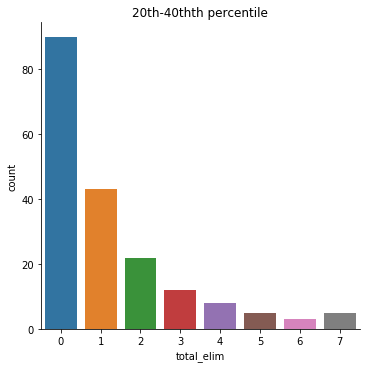

In [178]:
plot_data = RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 1]
sns.catplot(x ='total_elim',data= plot_data,kind = 'count')
plt.title('20th-40thth percentile')
print('Mean: ' + str(plot_data['total_elim'].mean()))
print('Var: ' + str(plot_data['total_elim'].var()))

Mean: 1.75
Var: 3.5911214953271027


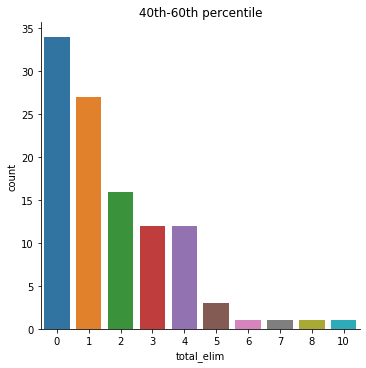

In [179]:
plot_data = RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 2]
sns.catplot(x ='total_elim',data= plot_data,kind = 'count')
plt.title('40th-60th percentile')
print('Mean: ' + str(plot_data['total_elim'].mean()))
print('Var: ' + str(plot_data['total_elim'].var()))

Mean: 2.116279069767442
Var: 5.724252491694353


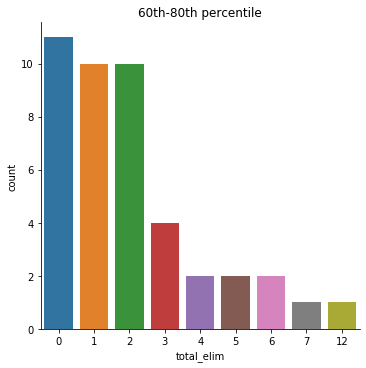

In [180]:
plot_data = RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 3]
sns.catplot(x ='total_elim',data= plot_data,kind = 'count')
plt.title('60th-80th percentile')
print('Mean: ' + str(plot_data['total_elim'].mean()))
print('Var: ' + str(plot_data['total_elim'].var()))

Mean: 2.64
Var: 2.74


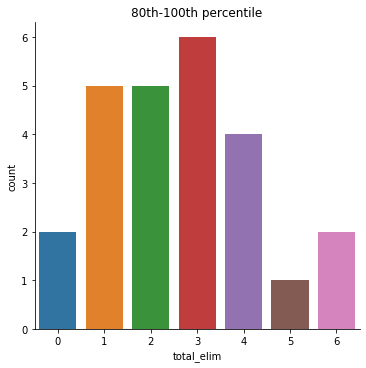

In [181]:
plot_data = RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 4]
sns.catplot(x ='total_elim',data= plot_data,kind = 'count')
plt.title('80th-100th percentile')
print('Mean: ' + str(plot_data['total_elim'].mean()))
print('Var: ' + str(plot_data['total_elim'].var()))

Interestingly, the data is overdispersed *except for the 80-100th percentile.* This is highly convenient, as the negative binomial fit is inherently noisier than the Poisson fit due to the non-uniformity of the mixture distributions. Having 

In [160]:
from scipy import stats 
import pymc3 as pm 
import re

In [161]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, var_names=varnames, figsize=(12, nrows*1.4),
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(trcs, varnames=varnames).iterrows()]))

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i, 0].annotate('{:.2f}'.format(mn), xy=(mn, 0), xycoords='data',
                          xytext=(5, 10), textcoords='offset points', rotation=90,
                          va='bottom', fontsize='large', color='#AA0022')


def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log', rv.name) or re.search('_interval', rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, prev_app, heel, face, avg_cum_elim, tag_overlap, prev_win, ic_reigns, world_reigns, hoss, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:42<00:00, 93.38draws/s] 
/home/christian/.local/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,hpd_2.5,hpd_97.5
Intercept,2.452585e-01,0.100282,5.917232e-01
hoss,3.545822e+00,2.263174,5.798434e+00
world_reigns,1.127580e+00,1.028054,1.238667e+00
ic_reigns,1.119657e+00,0.954739,1.286097e+00
prev_win,1.780499e+00,1.097279,2.901545e+00
tag_overlap,1.001287e+00,1.000330,1.002457e+00
avg_cum_elim,1.131156e+00,0.967740,1.305258e+00
face,1.937820e+00,0.776385,4.611087e+00
heel,2.203917e+00,0.908182,5.664707e+00
prev_app,9.003356e-01,0.827964,9.730955e-01


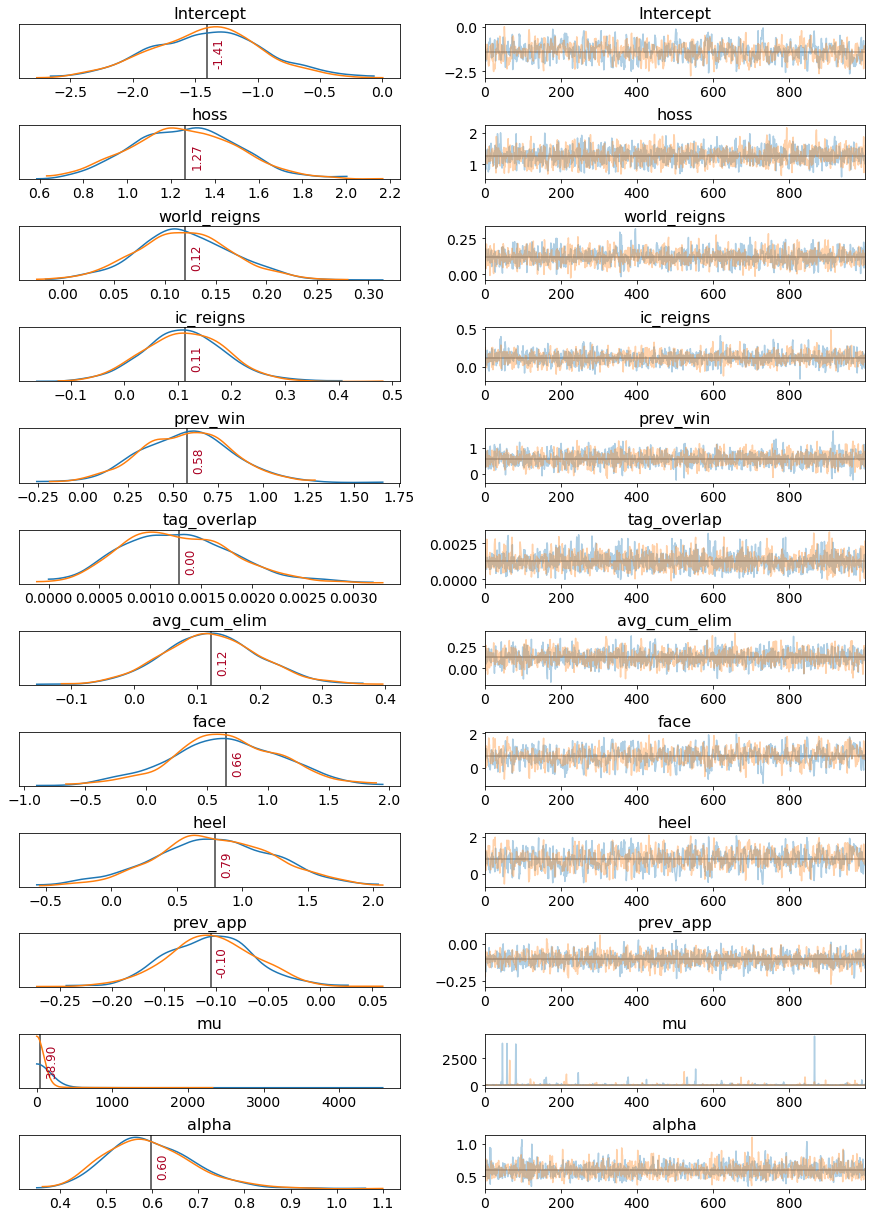

In [170]:
fml = 'total_elim ~  hoss + world_reigns + ic_reigns + prev_win + tag_overlap + avg_cum_elim + face + heel + prev_app'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 0], 
                                    family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)
    
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(trace,varnames=varnames)
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, prev_app, heel, face, avg_cum_elim, tag_overlap, prev_win, ic_reigns, world_reigns, hoss, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:37<00:00, 105.65draws/s]
/home/christian/.local/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,hpd_2.5,hpd_97.5
Intercept,4.491212e-01,0.129335,1.465552e+00
hoss,2.394765e+00,1.518089,3.628689e+00
world_reigns,1.100406e+00,0.984853,1.232632e+00
ic_reigns,1.080022e+00,0.934682,1.236662e+00
prev_win,1.209931e+00,0.645299,2.477722e+00
tag_overlap,1.000671e+00,0.999942,1.001491e+00
avg_cum_elim,1.175436e+00,1.058097,1.295203e+00
face,1.325158e+00,0.413454,4.731474e+00
heel,1.479249e+00,0.465301,5.297552e+00
prev_app,9.550486e-01,0.884661,1.028984e+00


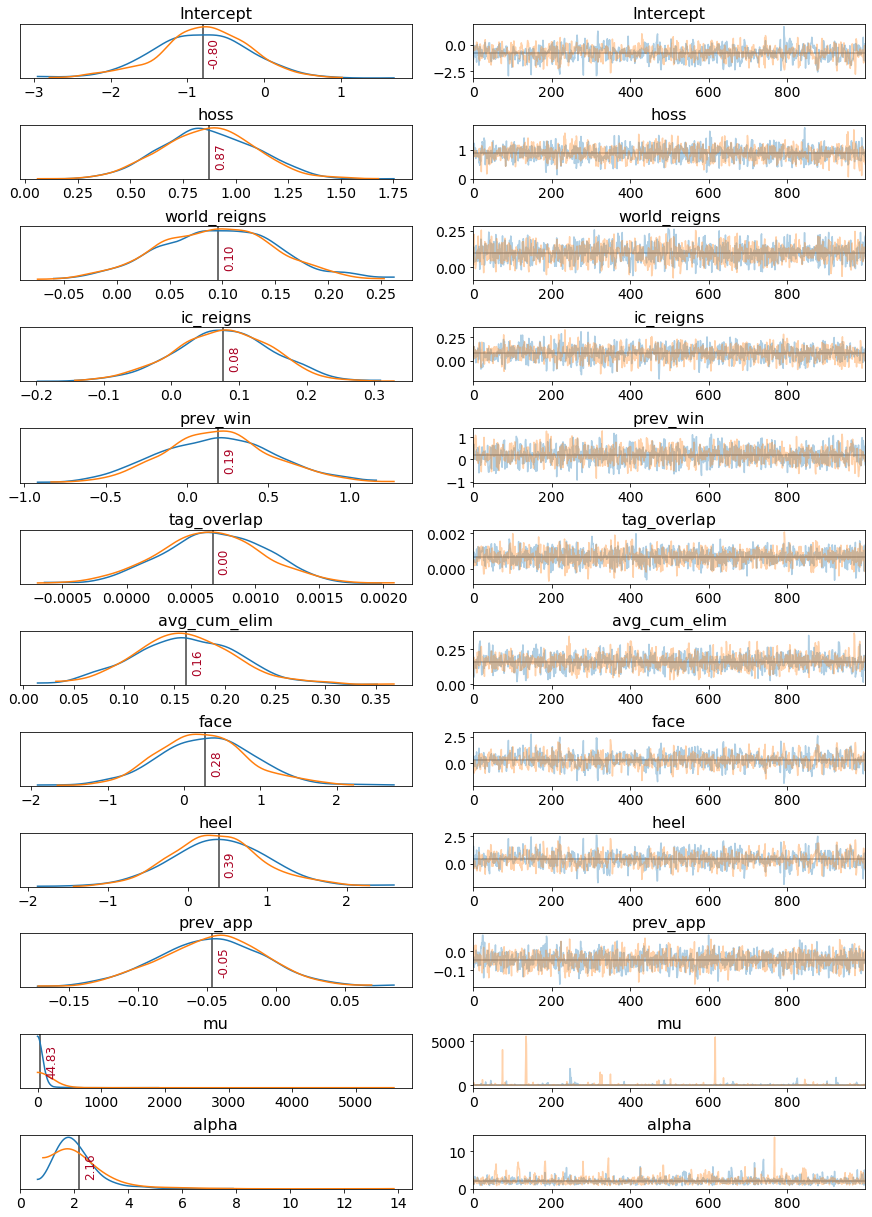

In [171]:
fml = 'total_elim ~  hoss + world_reigns + ic_reigns + prev_win + tag_overlap + avg_cum_elim + face + heel + prev_app'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 1], 
                                    family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)
    
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(trace,varnames=varnames)
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, prev_app, heel, face, avg_cum_elim, tag_overlap, prev_win, ic_reigns, world_reigns, hoss, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:37<00:00, 107.84draws/s]
/home/christian/.local/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,hpd_2.5,hpd_97.5
Intercept,4.065490e-01,0.083774,1.382086e+00
hoss,2.182543e+00,1.240455,4.084031e+00
world_reigns,1.051003e+00,0.956916,1.160856e+00
ic_reigns,1.094635e+00,0.924135,1.336997e+00
prev_win,1.493837e+00,0.737006,3.148002e+00
tag_overlap,1.000123e+00,0.999528,1.000687e+00
avg_cum_elim,1.059693e+00,0.931564,1.233703e+00
face,2.798963e+00,0.705188,1.177485e+01
heel,3.355593e+00,0.785608,1.341898e+01
prev_app,9.790285e-01,0.870739,1.109716e+00


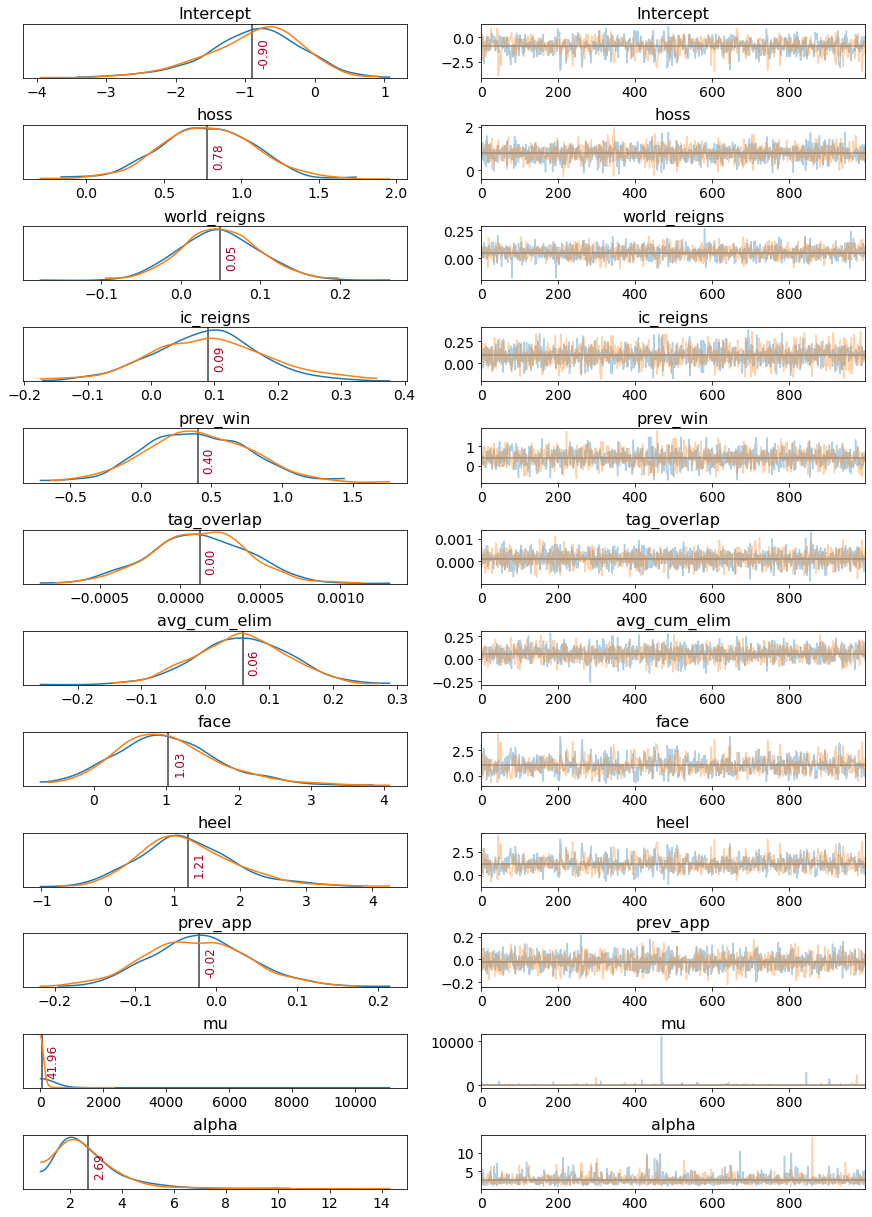

In [172]:
fml = 'total_elim ~  hoss + world_reigns + ic_reigns + prev_win + tag_overlap + avg_cum_elim + face + heel + prev_app'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 2], 
                                    family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)
    
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(trace,varnames=varnames)
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, mu, prev_app, heel, face, avg_cum_elim, tag_overlap, prev_win, ic_reigns, world_reigns, hoss, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:48<00:00, 83.23draws/s] 
The acceptance probability does not match the target. It is 0.8860653791056693, but should be close to 0.8. Try to increase the number of tuning steps.
/home/christian/.local/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,hpd_2.5,hpd_97.5
Intercept,7.418932e-01,0.035997,1.055807e+01
hoss,2.444774e+00,1.048800,5.616442e+00
world_reigns,1.286074e+00,0.837175,1.957588e+00
ic_reigns,1.009437e+00,0.704348,1.388891e+00
prev_win,1.075039e+00,0.207267,5.778682e+00
tag_overlap,1.000860e+00,1.000292,1.001468e+00
avg_cum_elim,1.112799e+00,0.993082,1.250126e+00
face,2.256146e+00,0.172493,6.061880e+01
heel,1.149036e+00,0.064891,2.495579e+01
prev_app,8.153389e-01,0.651876,1.035137e+00


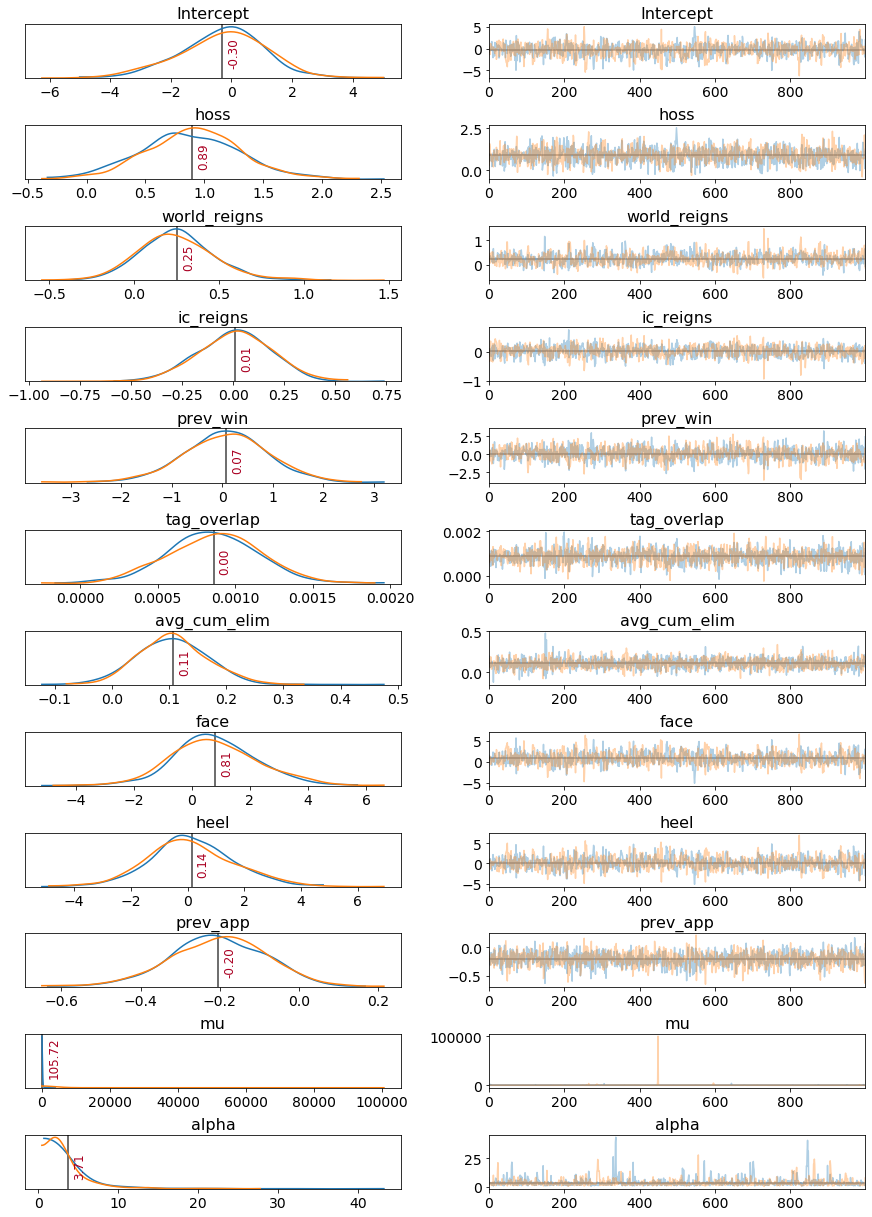

In [173]:
fml = 'total_elim ~  hoss + world_reigns + ic_reigns + prev_win + tag_overlap + avg_cum_elim + face + heel + prev_app'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 3], 
                                    family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)
    
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(trace,varnames=varnames)
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, prev_app, heel, face, avg_cum_elim, tag_overlap, prev_win, ic_reigns, world_reigns, hoss, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [07:59<00:00,  8.34draws/s]
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/home/christian/.local/lib/python3.6/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or

,mean,hpd_2.5,hpd_97.5
Intercept,1.394272e+121,9.637001e-317,inf
hoss,1.839829e+00,6.799492e-01,3.907212e+00
world_reigns,9.808128e-01,8.752710e-01,1.080887e+00
ic_reigns,1.107268e+00,9.623497e-01,1.254194e+00
prev_win,1.429973e+00,6.413805e-01,3.126193e+00
tag_overlap,9.998500e-01,9.993543e-01,1.000259e+00
avg_cum_elim,1.067529e+00,8.099129e-01,1.570015e+00
face,9.347420e-122,0.000000e+00,inf
heel,1.522238e-121,0.000000e+00,inf
prev_app,1.004684e+00,8.970615e-01,1.136147e+00


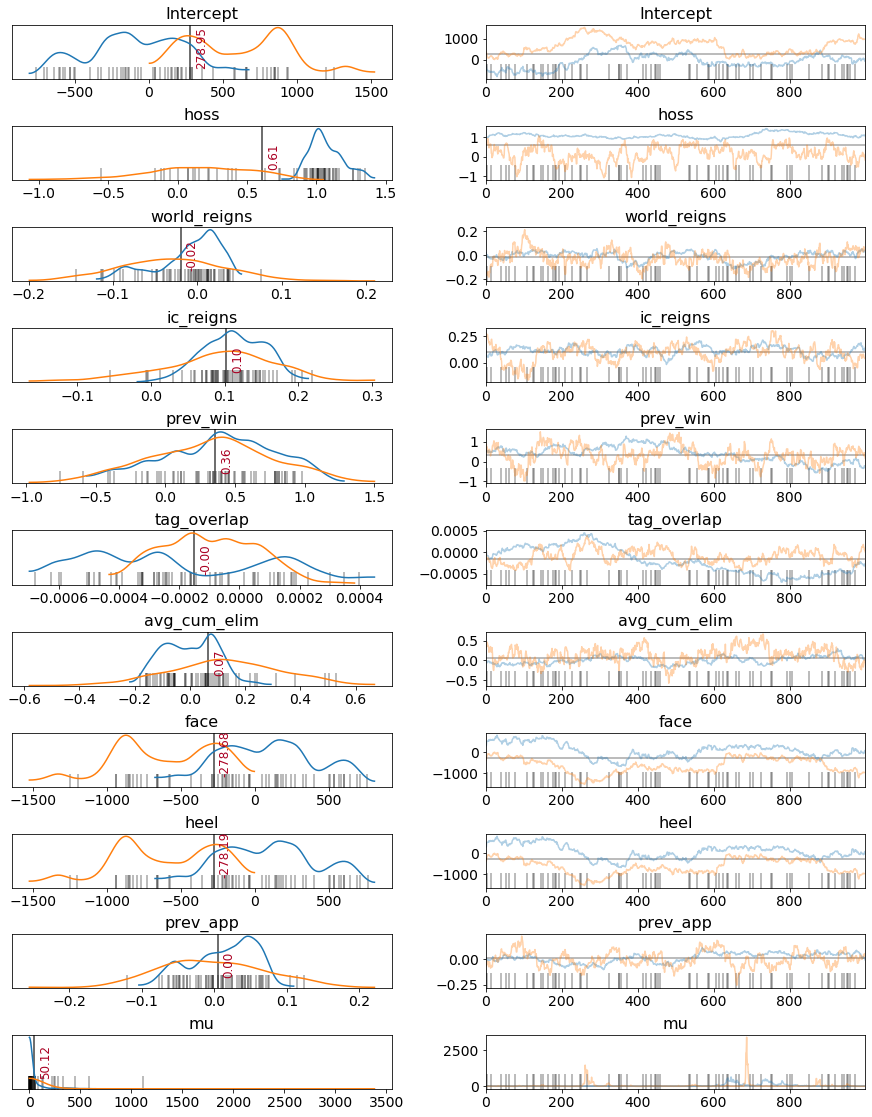

In [174]:
fml = 'total_elim ~  hoss + world_reigns + ic_reigns + prev_win + tag_overlap + avg_cum_elim + face + heel + prev_app'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=RUMBLE_DATA.loc[RUMBLE_DATA['time_class'] == 4], 
                                    family=pm.glm.families.Poisson())
    trace = pm.sample(1000,init = 'adapt_diag', tune=1000, cores=2)
    
varnames = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(trace,varnames=varnames)
np.exp(pm.summary(trace,varnames=varnames))[['mean','hpd_2.5','hpd_97.5']]

The script to create a simulation based on these parameters is currently being built, as well as tuning of the time classification & negative binomial/Poisson model for more accuracy.

## SIMULATOR PSUEDO-ALGORITHM

1) Initialize a random entry order for 30 of the members of the WWE roster (weights will be allocated much more heavily to those we expect to participate in the match vs. those who are unlikely to enter)

2) Randomly generate entry times using a tightly-packed Normal distribution combining individual and location-based historical data (in 2020 the event will be held in a large dome arena instead of a small venue, which affects the length of the entrance ramp).

3) At any given state, use the historical negative-binomial and/or Poisson regression models based on their "time class," with their class membership coming from voting on their empirical history as well as entry number in the current match, to generate eliminations.

4) Based on historical data, entry number, and if possible stochastic correlates (e.g. the probability of being eliminated when a wrestler with many historical eliminations enters after you vs. one who does not), project either or both of a) exit number and b) total time, with estimates updating when new entrants arrive and when other contestants leave, using a combination of the gradient boost and linear models, as well as stochastic methods (details below).

5) A simulated elimination will eliminate in the match based on who is the eliminator, historical time class membership, and the exit number predictions with weights formed by empirical posteriors. 

# The Royal Rumble as a Stochastic Process

One of my initial ideas for the project was to employ a Hidden Markov model. The 'hidden states' aspect of the model is a good fit for the process in the abstract, as we streams of output over different time intervals throughout the match but don't observe the direct processes that dictate those results. Another benefit of this model is that we know ex ante that this is a mixture model- the entrances and exits are borne of different distributions entirely, and we can also reasonably infer that the distributions are not independent, which is baked into the HMM from the start. If we parameterize time as discrete, we can think of the Royal Rumble as satisfying the Markov property insofar as the next state in the sequence can fork in three directions. The first is that the state stays the same, the second that someone enters the match, the third being that one or more participants exit the match. The encoding structure for a model of this sort *could* be length 30 one-hot vectors to represent 'in' and 'out', but the E-M algorithm used for Hidden Markov models needs full support for every state in both the prior transition matrix and in the random state initialization. Given how sparse some of these vectors are relative to the empirics (the sample maximum of wrestlers in the ring at any given time in any given year is only 15), the model would not be able to converge in a meaningful way. If, instead, we suppress the one-hot vectors into simply the number of wrestlers in the ring at time t, fitting a Hidden Markov model may show us general trends.

In [38]:
rumble_states = eval(open('num_in_states.txt','r').read())

#Add a synthetic state to avoid log-probability 0 problems
for year in rumble_states.keys():
    rumble_states[year].append((len(states), 0))


In [39]:
from hmmlearn.hmm import MultinomialHMM

In [60]:
states_09 = rumble_states[2009]

num_in_09 = np.array([y for (x,y) in states_09]).reshape(-1,1)
rumble_prior = np.ones(16)
rumble_prior = rumble_prior/240
rumble_prior[2] = 15/16



markov_rumble = MultinomialHMM(n_components = 16,startprob_prior = rumble_prior)
                               

markov_rumble.fit(num_in_09)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=16,
               n_iter=10, params='ste',
               random_state=RandomState(MT19937) at 0x7F0A7024C990,
               startprob_prior=array([0.00416667, 0.00416667, 0.9375    , 0.00416667, 0.00416667,
       0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00416667,
       0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00416667,
       0.00416667]),
               tol=0.01, transmat_prior=1.0, verbose=False)

The above code will execute, and a Hidden Markov model will be fitted to the sequence of number of wrestlers in the ring for the 2009 Royal Rumble. This year was carefully chosen, as it features the empirical maximum across all the decades of matches, having 15 wrestlers in the match at one point. Without the addition of the synthetic state of 0 wrestlers in (which is sensible upon the match's conclusion) the hmmlearn package will not be able to fit the data to a multinomial distribution. We can observe the transition matrix below. While it certainly isn't perfect, the algorithm was quickly able to identify that we can't go to certain states from others by allocating them vanishingly small probabilities.

In [61]:
markov_rumble.transmat_

array([[9.82758638e-01, 2.67148281e-25, 9.37177049e-06, 3.34230065e-08,
        1.29216171e-02, 1.72515072e-38, 6.98585207e-29, 3.32500087e-27,
        1.21848114e-37, 4.31033976e-03, 6.58030671e-23, 2.22492190e-19,
        2.16726560e-16, 7.46606975e-25, 4.94309842e-20, 7.71708528e-21],
       [1.29898414e-25, 8.44846863e-01, 3.40273416e-03, 3.62318975e-04,
        4.55857039e-04, 1.26680110e-22, 2.26116955e-09, 1.20070531e-25,
        4.53496809e-03, 5.65405734e-25, 9.78374749e-02, 1.01384831e-21,
        3.75046798e-04, 4.81847348e-02, 1.07563702e-19, 1.29029813e-24],
       [7.23908211e-05, 4.60525773e-02, 1.82955614e-01, 2.15057722e-02,
        6.26397766e-01, 5.02047902e-13, 1.25440880e-09, 3.63268898e-02,
        8.61488112e-16, 5.37998393e-25, 1.36673068e-02, 1.48529103e-03,
        9.05305120e-10, 1.76518571e-02, 5.12851568e-02, 2.59937538e-03],
       [1.61922378e-05, 3.39860610e-02, 1.61873430e-01, 1.20680193e-01,
        4.95046427e-01, 3.44955687e-10, 1.03597299e-08, 1.309

The problem, however, is that the algorithm won't be able to fit a new stream of data from another year, because it won't fit a multinomial distribution. For example, in 2018, the most wrestlers in the ring at a given time was 11. If we try to fit this sequence to the existing model, we get in trouble very quickly.

In [64]:
num_in_2018 = np.array([y for (x,y) in rumble_states[2018]]).reshape(-1,1)
markov_rumble.fit(num_in_2018)

/home/christian/.local/lib/python3.6/site-packages/hmmlearn/hmm.py:412: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T
/home/christian/.local/lib/python3.6/site-packages/hmmlearn/utils.py:79: RuntimeWarning: invalid value encountered in log
  return np.log(a)


MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=16,
               n_iter=10, params='ste',
               random_state=RandomState(MT19937) at 0x7F0A7024C990,
               startprob_prior=array([0.00416667, 0.00416667, 0.9375    , 0.00416667, 0.00416667,
       0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00416667,
       0.00416667, 0.00416667, 0.00416667, 0.00416667, 0.00416667,
       0.00416667]),
               tol=0.01, transmat_prior=1.0, verbose=False)

In [65]:
markov_rumble.transmat_

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

There may be a fruitful way to analyze the data using the pomegranate package, which has more customization for initializing distributions and parameterizing the model. I am also interested in using the hsmmlearn model, which may be a better fit in general due to the 'only sometimes' Markovian nature of the match itself. If we observe how the matches unfold in terms of the numbers of wrestlers in the match vs. time, we *do* observe some regularity. At least one valley appears to be expected relative to the peaks, and it appears that, as time has gone on, the valley tends to have more wrestlers in than it did during early years. Though the matches differ in explicit length, I do believe that some manner of stochastic mixture model will identify and differentiate some of the variation among these somewhat regular patterns. I will continue to update this section as the project goes on.

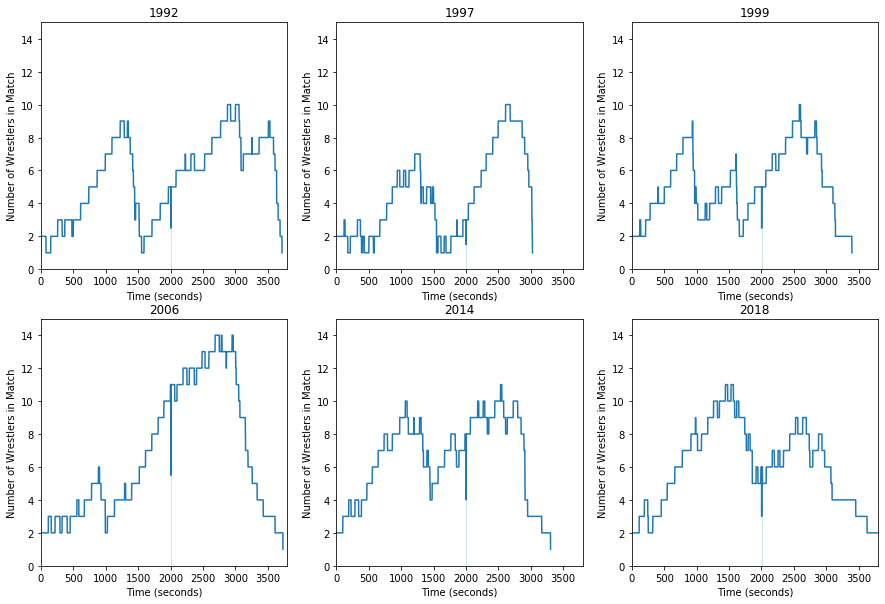

In [116]:
test_years = [1992, 1997, 1999, 2006, 2014, 2018]
rows = 2
columns = 3
counter = 1

plt.figure(figsize = (15,10))

for year in test_years:
    plt.subplot(rows,columns,counter)
    sns.lineplot([x for x,y in rumble_states[year]], [y for x,y in rumble_states[year]])
    plt.title(str(year))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Number of Wrestlers in Match')
    plt.xlim(0,3800)
    plt.ylim(0,15)
    counter += 1
plt.show()

In [ ]:
g = sns.catplot(x = 'total_elim', row = 'face,')

# Predicting the order of entries into the Royal Rumble match

As established in the outset of the project, the order in which wrestlers enter the Royal Rumble match is purportedly random (in 1989 when the Million Dollar Man Ted DiBiase purchased the #30 entry from another wrestler, or in 2016 when Roman Reigns was punished by the villainous WWE brass for standing up to the establishment and forced to enter at #1 *whilst defending his WWE championship against the 29 other entrants* notwithstanding), but we know anecdotally that this isn't the case. Kofi Kingston is well-known for unconventionally and fantastically avoiding elimination, which has happened during a lull in the middle of the match for several consecutive years. There is *no way* that his entrances follow the discrete uniform distribution, as his kernel density plot shows below. Similarly, the Big Show, John Cena, and Batista are all practically guaranteed to enter in 20's. Other wrestlers have fairly polarized entrances, often because they can be trusted to perform well for long stretches while in their prime but as they age they no longer have that capability as in the case of Rey Mysterio and Shawn Michaels. There are nine such plots below: 

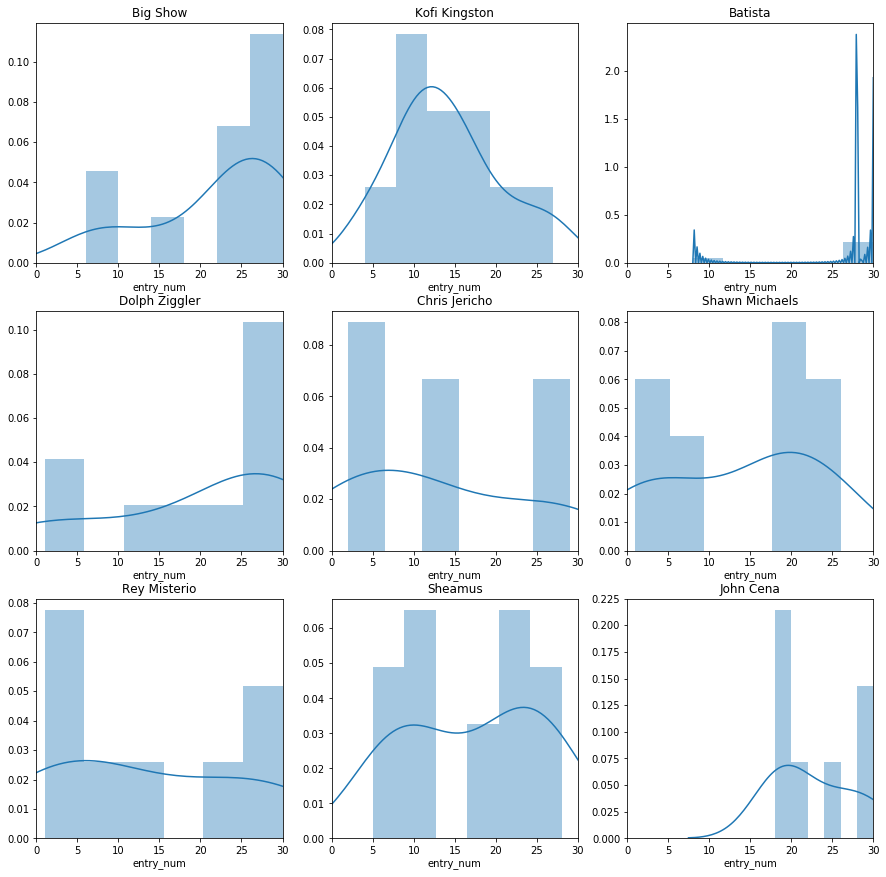

In [202]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Big Show', 'entry_num'], bins = 6)
plt.title('Big Show')
plt.xlim(0,30)

plt.subplot(3,3,2)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Kofi Kingston', 'entry_num'], bins = 6)
plt.title('Kofi Kingston')
plt.xlim(0,30)

plt.subplot(3,3,3)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Batista', 'entry_num'], bins = 6)
plt.title('Batista')
plt.xlim(0,30)

plt.subplot(3,3,4)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Dolph Ziggler', 'entry_num'], bins = 6)
plt.title('Dolph Ziggler')
plt.xlim(0,30)

plt.subplot(3,3,5)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Chris Jericho', 'entry_num'], bins = 6)
plt.title('Chris Jericho')
plt.xlim(0,30)

plt.subplot(3,3,6)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Shawn Michaels', 'entry_num'], bins = 6)
plt.title('Shawn Michaels')
plt.xlim(0,30)

plt.subplot(3,3,7)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Rey Mysterio', 'entry_num'], bins = 6)
plt.title('Rey Misterio')
plt.xlim(0,30)

plt.subplot(3,3,8)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'Sheamus', 'entry_num'], bins = 6)
plt.title('Sheamus')
plt.xlim(0,30)

plt.subplot(3,3,9)
sns.distplot(RUMBLE_DATA.loc[RUMBLE_DATA['name'] == 'John Cena', 'entry_num'], bins = 6)
plt.title('John Cena')
plt.xlim(0,30)


plt.show()

These are good qualitative explanations that are extremely difficult to pack into a model. Through several iterations of different GLM and ensemble methods, none of the available data formed a cogent predictive model. The next obvious place to look is through empirical Bayesian methods. There are a few major problems with trying to predict the 2020 Royal Rumble entry order by using Monte Carlo or other similar methods with the empirical posteriors. One is that the WWE is at a bit of a turning point- they are trying to create new stars as the brunt of those for which we have the best data are either in pseudo-retirement (Kane makes cameos from time to time but is the mayor of Knox County, TN, John Cena is transitioning to a career in film and TV, etc.), so the posteriors for the brunt of the participants in the 2020 Royal Rumble will be extremely nosy. We will not be able to form scaled beta or beta-binomial (depending on parameterization) posteriors from the discrete uniform distribution on {1,2,...,30} due to a lack of historical data for many of the prospective entrants. The discrete uniform distribution is completely uninformative for the scope of this problem, and it's simply asking far too much of the model to draw from an empirical distribution with just a couple observations. The direction that makes the most sense to me is to find more features outside the specific context of the Royal Rumble to further homogenize comparisons between wrestlers. How similar is Rick Martel to Dolph Ziggler? How similar is Daniel Bryan to Bret Hart? If we can cluster wrestlers, we may be able to find a reasonable sample for posteriors for a given 'type' of wrestler- with further conditional estimates to narrow the estimate from a subgroup to the most likely candidate based on available information.